## **1. Réalisation du fichier .WAV contenant les sons générés par un clavier téléphone**

**Nous avons générés les tonalités DTMF à partir d'Audacity :**

chaque touche a été générée :
1, 2, 3, 4, 5, 6, 7, 8, 9, 0, #, *

![Générateur](SAE22/images/Generateur.png)

**Puis nous les avons exporté en fichier .wav à partir du logiciel Audacity :**

![Audacity](SAE22/images/Audacity.png)

## **2. Réalisation de l'analyse spectrale des différents sons**

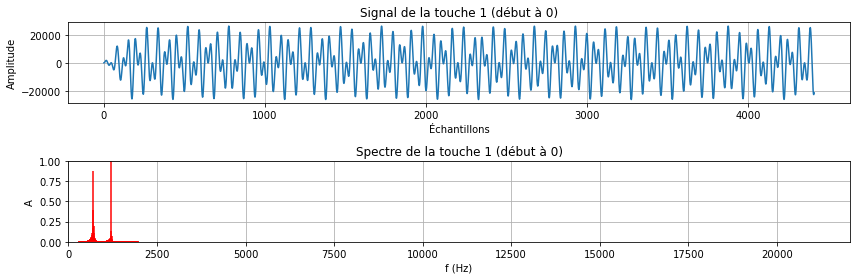

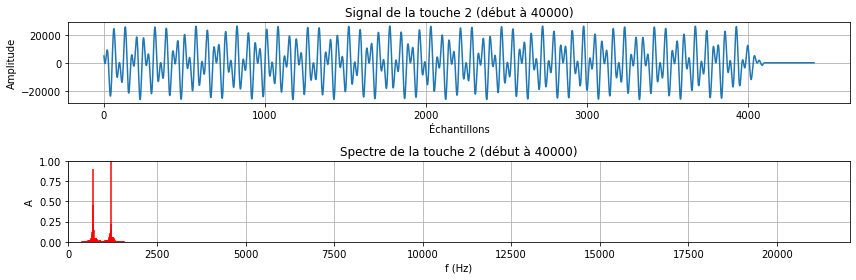

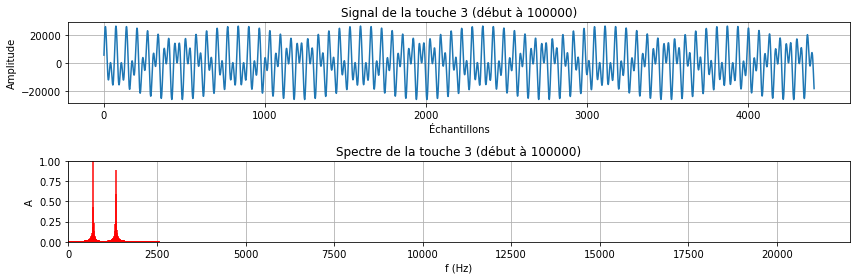

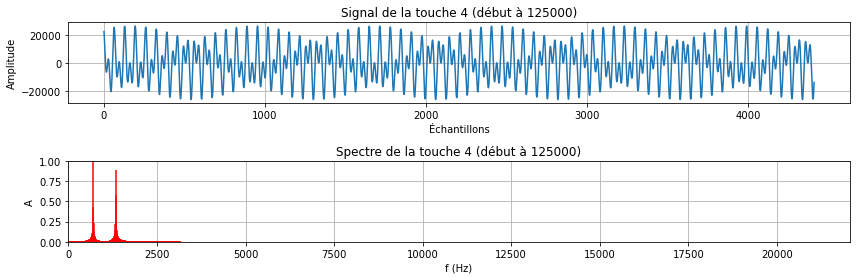

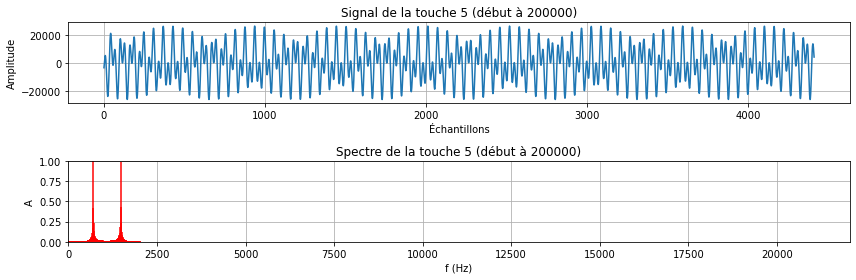

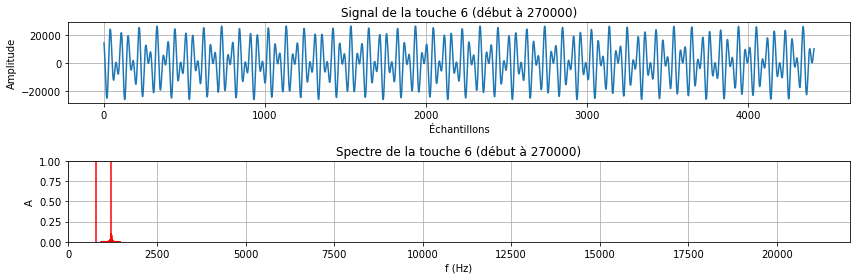

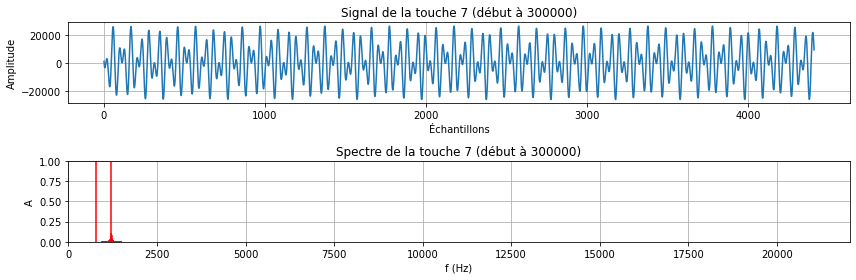

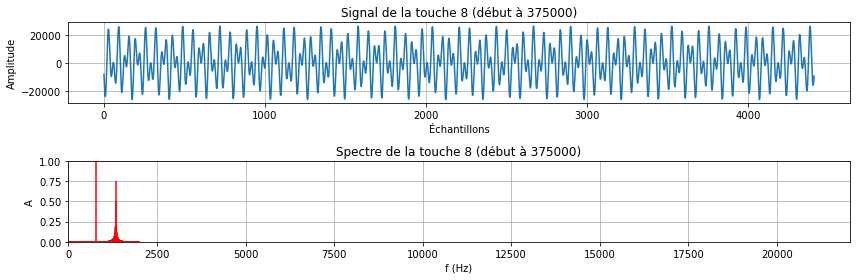

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile as wave
from numpy.fft import fft

# Lecture du fichier audio et récupération du taux d'échantillonnage (rate) et des données audio (data)
rate, data = wave.read('tonalite.wav')

# Indices de début de chaque touche dans le fichier audio (à ajuster selon votre fichier)
debut_touches = [0, 40000, 100000, 125000, 200000, 270000, 300000, 375000]

# Durée d'analyse de chaque touche
duree_analyse = 0.1  # Par exemple, 0.1 seconde

# Fonction pour tracer le spectre en fréquence
def tracerSpectre(data, rate):
    # Calcul de la FFT des données audio
    spectre = np.absolute(fft(data))

    # Normalisation du spectre en divisant par sa valeur maximale
    spectre = spectre / spectre.max()

    # Calcul des fréquences correspondantes à chaque composante de la FFT
    n = spectre.size
    freq = np.arange(n) * 1.0 / n * rate

    # Tracé du spectre normalisé en rouge
    plt.vlines(freq, [0], spectre, 'r')
    plt.xlabel('f (Hz)')
    plt.ylabel('A')
    plt.axis([0, 0.5 * rate, 0, 1])
    plt.grid()

# Analyse de chaque touche individuellement
for i, debut in enumerate(debut_touches):
    plt.figure(figsize=(12, 4))
    plt.subplot(2, 1, 1)
    plt.plot(data[debut:debut+int(rate*duree_analyse)])
    plt.title('Signal de la touche {} (début à {})'.format(i+1, debut))
    plt.xlabel('Échantillons')
    plt.ylabel('Amplitude')
    plt.grid()

    plt.subplot(2, 1, 2)
    tracerSpectre(data[debut:debut+int(rate*duree_analyse)], rate)
    plt.title('Spectre de la touche {} (début à {})'.format(i+1, debut))
    plt.tight_layout()
    plt.show()


## **3. Programme  python qui affiche le numéro des différentes touches entendues dans le fichier .WAV**

In [ ]:
import math
import numpy as np
from matplotlib.pyplot import *
import scipy.io.wavfile as wave
from numpy.fft import fft

# Définition des fréquences des touches DTMF
f1 = [697, 770, 852, 941]
f2 = [1209, 1336, 1477, 1633]

# Fonction pour identifier la touche DTMF en fonction des fréquences
def identifier_touche(f1, f2):
    if f1 == 697 and f2 == 1209:
        return '1'
    elif f1 == 697 and f2 == 1336:
        return '2'
    elif f1 == 697 and f2 == 1477:
        return '3'
    elif f1 == 697 and f2 == 1633:
        return 'A'
    elif f1 == 770 and f2 == 1209:
        return '4'
    elif f1 == 770 and f2 == 1336:
        return '5'
    elif f1 == 770 and f2 == 1477:
        return '6'
    elif f1 == 770 and f2 == 1633:
        return 'B'
    elif f1 == 852 and f2 == 1209:
        return '7'
    elif f1 == 852 and f2 == 1336:
        return '8'
    elif f1 == 852 and f2 == 1477:
        return '9'
    elif f1 == 852 and f2 == 1633:
        return 'C'
    elif f1 == 941 and f2 == 1209:
        return '*'
    elif f1 == 941 and f2 == 1336:
        return '0'
    elif f1 == 941 and f2 == 1477:
        return '#'
    elif f1 == 941 and f2 == 1633:
        return 'D'
    else:
        return None

# Chargement du fichier audio
rate, data = wave.read('tonalite.wav')

# Analyse spectrale pour chaque touche DTMF
duree_touche = 2 # durée de chaque touche
touche = '' # variable pour stocker la touche identifiée
for i in range(12): # il y a 12 touches DTMF dans le fichier audio
    debut = i*duree_touche
    start = int(debut*rate)
    stop = int((debut+duree_touche)*rate)
    spectre = np.absolute(fft(data[start:stop]))
    spectre = spectre/spectre.max()
    n = spectre.size
    freq = np.arange(n)*1.0/n*rate
    f1_detectee = 0
    f2_detectee = 0
    for j in range(len(freq)):
        if spectre[j] > 0.1: # seuil de détection
            if f1_detectee == 0:
                for k in range(len(f1)):
                    if abs(freq[j]-f1[k]) < 10: # tolérance de 10 Hz
                        f1_detectee = f1[k]
                        break
            if f2_detectee == 0:
                for k in range(len(f2)):
                    if abs(freq[j]-f2[k]) < 10: # tolérance de 10 Hz
                        f2_detectee = f2[k]
                        break
            if f1_detectee != 0 and f2_detectee != 0:
                touche_detectee = identifier_touche(f1_detectee, f2_detectee)
                if touche_detectee is not None:
                    touche += touche_detectee
                    print(f"Touche détectée : {touche_detectee}")
                    break
print(f"Numéro de téléphone détecté : {touche}")


Touche détectée : 1
Touche détectée : 2
Touche détectée : 3
Touche détectée : 4
Touche détectée : 5
Touche détectée : 6
Touche détectée : 7
Touche détectée : 8
Touche détectée : 9
Touche détectée : 0
Touche détectée : #
Touche détectée : *
Numéro de téléphone détecté : 1234567890#*
